# Detecting and Classifying Toxic Comments

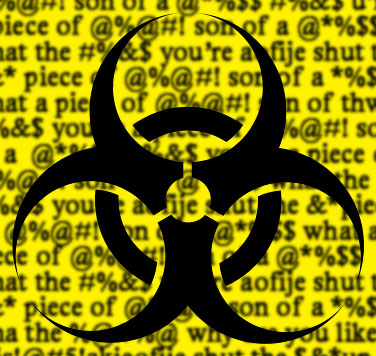

# Part 1: Basic Text Preperation

Detecting Insults in Social Commentary

Data from Wikipedia 

# Resources & Articles

Resources:
- [Detecting Insults in Social Commentary Dataset On Kaggle](https://www.kaggle.com/c/detecting-insults-in-social-commentary/data) 
- [Cleaned Toxic Comments on Kaggle](https://www.kaggle.com/fizzbuzz/cleaned-toxic-comments)  
- [Insult Sets](https://www.kaggle.com/rogier2012/insult-sets)  
- [Wikipedia Talk Labels: Personal Attacks](https://datasetsearch.research.google.com/search?query=stalking%20text&docid=L2cvMTFqbnl5cWw0Xw%3D%3D) 
    -  [At Kaggle](https://datasetsearch.research.google.com/search?query=stalking%20text&docid=L2cvMTFqbnl5cWw0Xw%3D%3D)  
- [Toxic Dataset](https://www.kaggle.com/ra2041/toxic-dataset)  
- [Dataset for Mean Birds: Detecting Agression and Bullying on Twitter](https://zenodo.org/record/1184178) 

Articles: 
- [NLP AND MACHINE LEARNING TECHNIQUES TO DETECT
ONLINE HARASSMENT...(has links to datasets)](https://dalspace.library.dal.ca/handle/10222/76331) 
- [Detecting Cyberbullying...](http://www.ijetsr.com/images/short_pdf/1517199597_1428-1435-oucip915_ijetsr.pdf) 




# Setup

We'll mount our Google Drive and import any necessary Python libraries.

## Mount Google Drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# ! pwd
# /content

# ! ls /content/gdrive/MyDrive/'Colab Notebooks'/capstone_exploration/data

## Kaggle Setup & Imports

We'll be using at least one Kaggle dataset.

Resources: 

- [Downloading Datasets directly into Google Drive](https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166)  


In [ ]:
# '''
# This code has been commented out as
# it is only necessary to run this once with your credentials.

# credentials, however, seem to be stored on the local machine
# '''

# from google.colab import files
# files.upload() #this will prompt you to update the json

# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission

In [ ]:
# ! ls gdrive/MyDrive/'Colab Notebooks'/capstone_exploration/data/toxic_comment_data

In [ ]:
# ! pwd

# ! ls gdrive/MyDrive/'Colab Notebooks'/capstone_exploration/data

In [ ]:
# ! kaggle competitions list -s jigsaw-toxic-comment-classification-challenge

# ! kaggle competitions download -c jigsaw-toxic-comment-classification-challenge -p /content/gdrive/MyDrive/Colab\ Notebooks/capstone_exploration/data

## spaCy Setup & Imports

In [ ]:
# # spaCy setup
# # update install to > version 3

# ! pip install -U spacy

# ! python -m spacy download en_core_web_lg

In [1]:
# spaCy Imports
import spacy

from spacy.lang.en import English
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

nlp = spacy.load('en_core_web_lg')

## Python Library Imports


Resources:
- [pool]()

In [5]:
# # download nltk resources if missing
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [2]:
import pandas as pd
import numpy as np

from collections import Counter
import re

# nltk imports
import nltk
from nltk.corpus import stopwords


# scikit learn imports
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

## Import Data to DataFrame

In [3]:
! ls ../data

train.csv


In [4]:
# # Load original from csv

# # path if using google colabs
# # path = "gdrive/MyDrive/Colab Notebooks/capstone_exploration/data/toxic_comment_data/train.csv"

# # local path
# path = '../data/train.csv'

# toxic_df = pd.read_csv(path)

# Basic Exploration

Texts in the dataset are labeled by human users as either **Toxic** or **Not Toxic**. 

Toxic comments can be further categorized as displaying any combination of five subcategories. Toxic comments can belong to any of the subcategories, multiple subcategories, or no further subcategories.

Subcategories:
- Severely toxic
- Obscene
- Threat
- Insult
- Identity hate

### Category Summary

| Category            	| Totals 	|
|---------------------	|-------:	|
| Not Toxic         	| 144277 	|
| Toxic             	|  15294 	|
| Toxic Subcategories 	|        	|
| Severely toxic      	|   1595 	|
| Obscene             	|   8449 	|
| Threat              	|    478 	|
| Insult              	|   7877 	|
| Identity hate       	|   1405 	|
| Subcategories Total 	|  19804 	|


### Proportions

About 10% of the comments in the dataset are considered Toxic.

```
Proportion of Not Toxic Comments in Dataset: 0.9041555169799024
Proportion of Toxic Comments in Dataset: 0.09584448302009764
```


Resources:
- [Table Generator](https://www.tablesgenerator.com/markdown_tables#)  

In [5]:
# how many rows labeled as not toxic?
not_toxic_count = toxic_df[toxic_df['toxic']==0].shape[0]
print(f"Rows labeled as Not Toxic: {not_toxic_count}") # not toxic: (144277) 

# rows labeled toxic
toxic_count = toxic_df[toxic_df['toxic']==1].shape[0]
print(f"Rows labeled as Toxic:      {toxic_count}") # toxic: (15294)
print('\n')
sub_toxic = toxic_df[['severe_toxic', 'obscene','threat','insult','identity_hate']].sum()

print(sub_toxic, '\n')
print(f"total sub_toxic:            {sub_toxic.sum()}")


Rows labeled as Not Toxic: 144277
Rows labeled as Toxic:      15294


severe_toxic     1595
obscene          8449
threat            478
insult           7877
identity_hate    1405
dtype: int64 

total sub_toxic:            19804


In [6]:
# Proportions:
total_rows = toxic_df.shape[0] # 159571

# Not Toxic Proportion
not_toxic_prop = not_toxic_count/total_rows # 0.9041555169799024
print(f"Proportion of Not Toxic Comments in Dataset: {not_toxic_prop}")

# Toxic Proportion
toxic_prop = toxic_count/total_rows # 0.09584448302009764
print(f"Proportion of Toxic Comments in Dataset: {toxic_prop}")


Proportion of Not Toxic Comments in Dataset: 0.9041555169799024
Proportion of Toxic Comments in Dataset: 0.09584448302009764


# Drop 'id' Column From Full Dataset
The id column is not really useful for our purposes, so we'll drop it from the dataframe

In [7]:
toxic_df.drop(columns='id', inplace=True)

# Basic Data Cleaning

Cleaning Functions:
- convert interior quotes to all single quotes
- strip any extraneous whitespace
- strip any ip addresses


In [8]:
# Convert all interior quotes to single quotes

def convert_interior_quotes(s):
    '''
    Arguments:
        s = Series of strings
            Takes a series of strings as an argument
            converts all interior quotes in a string to single quotes
    Returns: 
        Series of strings with interior quotes
    '''
    quotes_pattern = '["]+'
    return s.str.replace(quotes_pattern, "'")

def strip_ip(s):
    '''
    Arguments:
        s = Series of strings
            Takes a series of strings as an argument
            removes any ip addresses
    Returns: 
        Series of strings without ip addresses
    '''
    ip_pat = '(?:[0-9]{1,3}\.){3}[0-9]{1,3}'
    return s.str.replace(ip_pat, "")

def strip_whitespace(s):
    '''
    Arguments:
        s = Series of strings
            Takes a series of strings as an argument
            removes extraneous whitespace
    Returns: 
        Series of strings without extraneous whitespace
    '''
    
    t = s.copy()
    # remove whitespace from edge
    t = t.str.strip()

    # reduce interior whitespace to single space
    t = t.str.replace('[\s]+', ' ')

    return t


def remove_all_punct(s):
    '''
    Arguments:
        s = Series of strings
            Takes a series of strings as an argument
            removes all punctuation
    Returns: 
        Series of strings with no punctuation
    '''
    not_alpha_pattern = '[^A-Za-z\s]'
    return s.str.replace(not_alpha_pattern, "")

def tidy_series(s):
    '''
    returns tidied series
    '''
    # copy series
    t = s.copy()

    # call individual functions
    t = convert_interior_quotes(t)
    t = strip_whitespace(t)
    t = strip_ip(t)

    return t



## Apply Cleaning to Full Dataset


In [9]:
# tidy comment_text
toxic_df['comment_text'] = tidy_series(toxic_df['comment_text'])

# Feature Engineering

There are a few features that are not obvious in the original dataset that may be useful for prediction and classification.

spaCy: doc and raw

In [10]:
toxic_df.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [12]:
# doc1 = nlp(toxic_df['comment_text'][0])

# for x, token in enumerate(doc1):
#     print(x, token.lemma_)

# textcat = nlp.add_pipe('textcat')
# print(nlp.pipeline)

In [13]:
%%time

def doc_per_row(s):

    t = s.copy()
    
    t = remove_all_punct(t)
    t = t.str.strip()

    return t.apply(lambda x: nlp(x))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [ ]:
# %%time
# toxic_df['doc_raw'] = doc_per_row(toxic_df['comment_text'])

Resource:  
- [running pandas operations in parallel](http://www.racketracer.com/2016/07/06/pandas-in-parallel/)  

In [31]:
# # parallelize dataframe

from multiprocessing import Pool
# import multiprocessing

# multiprocessing.cpu_count() # 2 for colabs
# num_partitions = 100
# num_cores = 4

def parallelize_dataframe(df, func, num_cores=2, num_partitions=100):
    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()

    return(df)

In [20]:
'''
Warning!

Processing this cell takes about 20 min using 4 cores

CPU times: user 4min 35s, sys: 4min 24s, total: 8min 59s
Wall time: 18min 31s
'''
# # test = parallelize_dataframe(toxic_df['comment_text'][:20], doc_per_row)

# %%time
# toxic_df['doc_per_row'] = parallelize_dataframe(toxic_df['comment_text'], doc_per_row, num_cores=4)

CPU times: user 4min 35s, sys: 4min 24s, total: 8min 59s
Wall time: 18min 31s


In [26]:
# # pickle current columns, including new doc column
'''
Warning!

Processing this cell takes about 10 min
'''

# ! ls ../data
# toxic_df.to_pickle("../data/toxic_2-1.pkl")

# ! ls ../data

train.csv
toxic_2-1 train.csv


classification with spacy

- [Really useful article](https://www.machinelearningplus.com/nlp/custom-text-classification-spacy/)  
- [another project on kaggle](https://www.kaggle.com/poonaml/text-classification-using-spacy)  
- [turbo charge you spacy nlp pipeline](https://towardsdatascience.com/turbo-charge-your-spacy-nlp-pipeline-551435b664ad) 
- [python & spacy nlp](https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/)  
- [cheat sheet](https://www.datacamp.com/community/blog/spacy-cheatsheet)  


Other Resources:
- [Naive bayes](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html)  

Video Resources:
- [spacy introduction, tokenization, lemmatization, stemming & techniques](https://www.youtube.com/watch?v=ZIiho_JfJNw)  

-



In [29]:
%%time

def raw_lemma_per_row(s):

    t = s.copy()
    return t.apply(lambda x: [i.lemma_ for i in x])

# test_lemma = raw_lemma_per_row(test)

# print(test_lemma)
# # raw_lemma_lst = [doc_v.lemma_ for doc_v in raw_doc_list]

# # toxic_df['raw_lemma'] = pd.Series(raw_lemma_lst)

# type(test_lemma)

# print(toxic_df['comment_text'][0])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [32]:
'''
Warning!

Processing this cell takes about 20 min using 4 cores

CPU times: user 3min 24s, sys: 3min 38s, total: 7min 3s
Wall time: 18min 27s
'''

# %%time
# # # toxic_df['lemma_raw'] = raw_lemma_per_row(toxic_df['doc_raw'])
# toxic_df['lemma_raw'] = parallelize_dataframe(toxic_df['doc_per_row'], raw_lemma_per_row, num_cores=8)

CPU times: user 3min 24s, sys: 3min 38s, total: 7min 3s
Wall time: 18min 27s


In [34]:
# toxic_df['lemma_raw'][0]

In [36]:
# # Pickle version 2

# %%time
# # pickle current df
# toxic_df.to_pickle("../data/toxic_2-2.pkl")

CPU times: user 2min 41s, sys: 3min 27s, total: 6min 9s
Wall time: 16min 20s


In [ ]:
# for token in doc1:
# #   print(f'{token.text:{20}} {token.lemma_:{20}} {token.pos_:{10}}')
#     print(f'{token.lemma_:{20}}')
#     # print(f'{token.lemma_:{21}}')

# Load from 2-2 Pickle file

In [5]:
! ls ../data

toxic_2-1.pkl toxic_2-2.pkl train.csv


In [9]:
'''
CPU times: user 2min 51s, sys: 1min 3s, total: 3min 54s
Wall time: 4min 31s
'''

# %%time
# # load from pickle file 2-2a
# path2_2 = "../data/toxic_2-2.pkl"

# toxic_df = pd.read_pickle(path2_2)

CPU times: user 2min 51s, sys: 1min 3s, total: 3min 54s
Wall time: 4min 31s


## Proportion of All-Caps Type

In many circles, typing in all caps is considered a way to indicate yelling. Before changing the initial text, we'll record the proportion of upper case letters to the total number of alphabetical characters. 

PossibleConfounds:
- [People with dislexia occasionally choose all-caps as an accomodataion](https://www.readandspell.com/us/writing-in-all-caps)  
- Quoted all-caps text
    - not counting quoted and block quoted text may help here.
- Text referencing all-caps acronymns
- Programming language conventions
    - e.g. SQL syntax typically inlcudes all-caps reserved words

### Custom Function: uppercase_proportion_column(s)


In [14]:
def uppercase_proportion_column(s):
    '''
    given a pandas Series:
        containing rows of strings
    returns: a series of floats representing
        the percentage of capital letters vs total alpha chars
        in provided strings
    '''
    import re # dependent on re

    uc_pattern = '[A-Z]'
    alpha_pattern = '[A-Za-z]'

    cap_count = s.str.findall(uc_pattern).str.len()
    # print(cap_count)

    alpha_char_count = s.str.findall(alpha_pattern).str.len()
    # print(alpha_char_count)

    uc_proportion = cap_count / alpha_char_count
    # print(uc_proportion)

    return uc_proportion

In [15]:
doc_lemma = nlp('Practice, practiced, practicing')
doc_lemma
print(doc_lemma) # can be indexed as a list

Practice, practiced, practicing


In [16]:
for token in doc_lemma:
    print(token.text, token.lemma_, token.lemma_.lower().strip())

Practice practice practice
, , ,
practiced practice practice
, , ,
practicing practice practice


In [17]:
# short_df['uppercase_proportion'] = uppercase_proportion_column(short_df['comment_text'])
# short_df.columns

## Apply Custom Features to Full Dataset

In [18]:
# create uppercase_proportion column
toxic_df['uppercase_proportion'] = uppercase_proportion_column(toxic_df['comment_text'])
toxic_df.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'doc_per_row', 'lemma_raw', 'uppercase_proportion'],
      dtype='object')

In [ ]:
'''
For the training set

mean all comments: 0.06935782330899092
mean not toxic:    0.060543219369827816
mean toxic:        0.1525068846306749
'''
# uppercase proportion for toxic comments is over twice that of not toxic comments.

In [19]:
# %%time
# '''
# CPU times: user 2min 31s, sys: 2min 45s, total: 5min 16s
# Wall time: 12min 24s
# '''
# # # Pickle version 3
# # toxic_df.to_pickle("../data/toxic_2-3.pkl")

CPU times: user 2min 31s, sys: 2min 45s, total: 5min 16s
Wall time: 12min 24s


# Load data from 2-3 Pickle File

In [3]:
%%time
# load from pickle file 2-3
'''
last load time:

CPU times: user 2min 59s, sys: 1min 9s, total: 4min 9s
Wall time: 4min 47s
'''
path2_3 = "../data/toxic_2-3.pkl"

toxic_df = pd.read_pickle(path2_3)

CPU times: user 3min 36s, sys: 1min 27s, total: 5min 4s
Wall time: 5min 50s


# Simple Train Test Split

As our process should first determine whether the text is toxic or not toxic, we'll make a simplified stratified train test split, ensuring our balance of toxic and non toxic rows are proportionally distributed.

For now, we won't be too concerned with the proportion of sub-categories, as our first step will be to filter not toxic from toxic, then run parallel operations for each toxic sub-category, as toxic sub-categories are not mutually exclusive.

## Stratified Split maintaining ratio of toxic to not toxic texts


In [8]:
# check current columns
toxic_df.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'doc_per_row', 'lemma_raw', 'uppercase_proportion'],
      dtype='object')

In [9]:
# split df into X(independent) and y(depenendent) groups
ind_cols = ['comment_text', 'doc_per_row', 'lemma_raw', 'uppercase_proportion']

X = toxic_df[ind_cols]
y = toxic_df.drop(columns=ind_cols)

print(f"X columns: {X.columns}\ny columns:{y.columns}")

X columns: Index(['comment_text', 'doc_per_row', 'lemma_raw', 'uppercase_proportion'], dtype='object')
y columns:Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')


In [10]:
# Train Test Split. Stratified on y['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42, 
                                                    stratify=y['toxic'])

In [11]:
tiny_X_train = X_train[0:5]

tiny_y_train = y_train[0:5]

print(tiny_X_train.head(1))
print(tiny_y_train.head(1))

                                            comment_text  \
27301  ' Meša Selimović I'm not opposing such a formu...   

                                             doc_per_row  \
27301  (Mea, Selimovi, I, m, not, opposing, such, a, ...   

                                               lemma_raw  uppercase_proportion  
27301  [Mea, Selimovi, I, m, not, oppose, such, a, fo...              0.045455  
       toxic  severe_toxic  obscene  threat  insult  identity_hate
27301      0             0        0       0       0              0


In [12]:
'''
For the training set

mean all comments: 0.06935782330899092
mean not toxic:    0.060543219369827816
mean toxic:        0.1525068846306749
'''

print(X_train['uppercase_proportion'].mean())
print(X_train['uppercase_proportion'][y_train['toxic']==0].mean())
print(X_train['uppercase_proportion'][y_train['toxic']==1].mean())


# uppercase proportion for toxic comments is over twice that of not toxic comments.

0.06935782330899092
0.060543219369827816
0.1525068846306749


'\nFor the training set\n\nmean all comments: 0.06935782330899092\nmean not toxic:    0.060543219369827816\nmean toxic:        0.1525068846306749\n'

# spaCy

Let's try out spaCy, a nlp processing library!

- https://course.spacy.io/en/chapter1
- [text classification with spaCy](https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/) 
- [customized list of stopwords](https://spacy.io/usage/linguistic-features#stop-words)  
- [Split Series into list of sentences](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html)  
- [contractions](https://theslaps.medium.com/cant-stand-don-t-want-contractions-with-spacy-39715cac2ebb)  


In [13]:
# spaCy Imports
import spacy

from spacy.lang.en import English
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [14]:
# # check version
! python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.0.5                         
Location         /opt/anaconda3/lib/python3.7/site-packages/spacy
Platform         Darwin-20.3.0-x86_64-i386-64bit
Python version   3.7.6                         
Pipelines        en_core_web_lg (3.0.0)        



## Establish spaCy Pipeline

"spaCy's components are supervised models for text annotations, meaning hey can only learn to reproduce examples, not guess new labels from raw text."

Code is modified from tutorial here:

Resource:
https://www.machinelearningplus.com/nlp/custom-text-classification-spacy/

In [6]:
nlp = spacy.load('en_core_web_lg')

In [7]:
# add binary textcat model
# # textcat: binary: toxic or not toxit
textcat = nlp.add_pipe("textcat", last=True)

# # # We'll add the second later
# # # textcat_multilabel: what type of toxic if toxic?
# nlp.add_pipe("textcat_multilabel", last=True)

nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'ner',
 'attribute_ruler',
 'lemmatizer',
 'textcat']

In [8]:
# adding labels to textcat
textcat.add_label("NOT TOXIC")
textcat.add_label("TOXIC")

NameError: name 'textcat' is not defined

In [ ]:
# initialize the model weights randomly 
# nlp.begin_training

# format

# test using small batch:

ind_text = tiny_X_train['comment_text']
dep_text = tiny_y_train['toxic']



# NLTK Naive Bayes


In [ ]:
# ! pip install --user -U nltk
# ! pip install sklearn

In [ ]:
# from nltk.classify import naivebayes

# from sklearn.svm import LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier
# classif = SklearnClassifier(LinearSVC())

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


pipeline = Pipeline([('tfidf', TfidfTransformer()),
                     ('chi2', SelectKBest(chi2, k=1000)),
                     ('nb', MultinomialNB())])
classif = SklearnClassifier(pipeline)

# SKLearn 

- Resources: 
[Naive Bayes Classification ](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html)  

In [ ]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
! jupyter --version